In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score,KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler 

def PolynomialRegression(degree, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [11]:
X = 6 * np.random.rand(200, 1) - 3
y = (0.9 + X**4 + 0.5 + X**3 + 10) + np.random.randn(200, 1) * 8
#print(pd.DataFrame(X))
print(pd.DataFrame(y))

             0
0    50.819532
1    15.582715
2     5.429326
3    26.319054
4    15.132744
..         ...
195   8.940543
196   2.904610
197   9.879593
198  13.838039
199  18.171523

[200 rows x 1 columns]


Text(0.5, 1.0, 'noise')

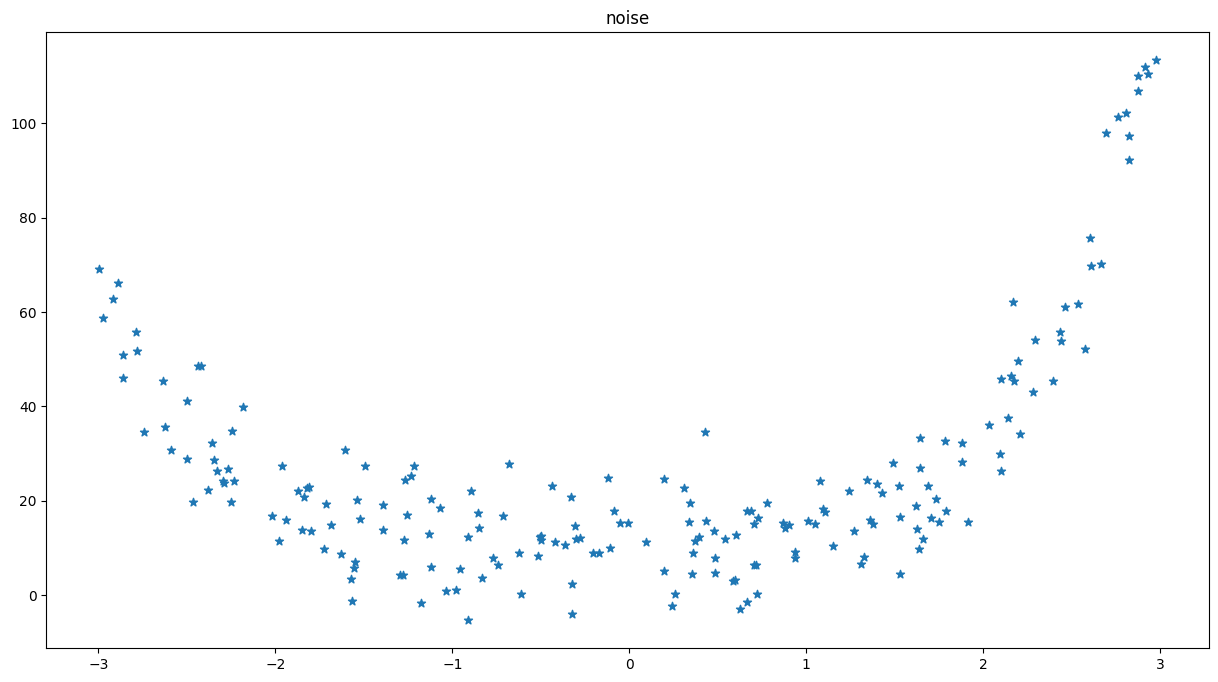

In [12]:
plt.figure(figsize=(15, 8))
plt.scatter(X, y, marker='*')
plt.title("noise")

In [18]:


def normal(train_data_X, test_data_X, train_data_y, test_data_y,  degree):
    output_mse = []
    output_score = []
    
    kf = KFold(n_splits=10, random_state=1, shuffle=True)
    

    # for i in range(1,11):
    # 
    
    
    model = PolynomialRegression(degree)
    model = model.fit(train_data_X, train_data_y)

    val_score = cross_val_score(model, train_data_X, train_data_y, scoring='neg_mean_squared_error', cv=kf)

    y_predict = model.predict(test_data_X)

    
    scores = mean_squared_error(test_data_y, y_predict)
    #print(val_score)
    
    output_score.append(-val_score)
    output_mse.append(scores)

    return round(np.mean(output_mse),4), np.mean(output_score)

In [14]:

def Inner_Loop(data_X, data_y):
    n = 10
    kf=KFold(n_splits=n, random_state=1, shuffle=True)
    output_cv_noisy = {}

    for  degree in range(0, 20):
        score1 = cross_val_score(PolynomialRegression(degree), data_X, data_y, scoring='neg_mean_squared_error', cv=kf)
        #print(score1)
        #print('\n')
        output_cv_noisy[degree] = round(-np.mean(score1), 3)
        print(degree,':',output_cv_noisy[degree])


    max_noisy_degree = min(output_cv_noisy, key=output_cv_noisy.get)
    max_noisy_value = output_cv_noisy[max_noisy_degree]
    print("Best degree :", max_noisy_degree, max_noisy_value)
    return max_noisy_degree


def Outer_Loop(data_X, data_y):
    output_score = []
    output_mse = []
    kf = KFold(n_splits=10, random_state=1, shuffle=True)
    
    #for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.5, random_state=1)


    tune_para = Inner_Loop(X_train, y_train)

    model = PolynomialRegression(tune_para)
    
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    val_score = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=kf)

    scores = mean_squared_error(y_test, y_predict)
    
    output_mse.append(scores)
    output_score.append(val_score)

    return round(np.mean(output_mse),4) , round(np.mean(-val_score),4)

scaler = StandardScaler()
scaler_X = scaler.fit_transform(X)
scaler_y = scaler.fit_transform(y)

print("- Normal -")
for i in range(20):
    print(f'{i}', f'Training : {normal(scaler_X , scaler_y, i)}')

print("- Nested -")
print(f'Training : CV {Outer_Loop(scaler_X , scaler_y)}')

- Normal -
0 Training : (1.0, 1.0040727191299053)
1 Training : (0.894, 0.9245033842537204)
2 Training : (0.2185, 0.22701169205720456)
3 Training : (0.1814, 0.1915450775741079)
4 Training : (0.1053, 0.11093887055847067)
5 Training : (0.1045, 0.11067375507712071)
6 Training : (0.1044, 0.11122684534174279)
7 Training : (0.1043, 0.11235998415726714)
8 Training : (0.1042, 0.11291649526183725)
9 Training : (0.1039, 0.11433558851011479)
10 Training : (0.1038, 0.1164757436654897)
11 Training : (0.1037, 0.11910369853128322)
12 Training : (0.1035, 0.11903038070074326)
13 Training : (0.1029, 0.1373116938771585)
14 Training : (0.1006, 0.11795143238686208)
15 Training : (0.1006, 0.11934711848606025)
16 Training : (0.0998, 0.14093565014195097)
17 Training : (0.0992, 0.12090439674188247)
18 Training : (0.099, 0.13501765926418383)
19 Training : (0.099, 0.12784432830647047)
- Nested -
0 : 1.311
1 : 1.132
2 : 0.233
3 : 0.196
4 : 0.098
5 : 0.099
6 : 0.101
7 : 0.103
8 : 0.105
9 : 0.104
10 : 0.107
11 : 0.1

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)
for i in range(20):
    print(i,normal(X_train, X_test, y_train, y_test, i))

0 (523.3611, 941.8555925526829)
1 (629.1964, 720.709097278021)
2 (144.9896, 187.60571144057016)
3 (214.9477, 88.33076331668715)
4 (96.5975, 53.046033330861384)
5 (93.8397, 55.24355601126251)
6 (117.307, 62.024594351253924)
7 (96.5111, 73.27945542098897)
8 (89.0726, 81.83836205966334)
9 (158.8419, 111.6517598795607)
10 (104.3248, 147.0165255042909)
11 (4773.0045, 119.60620419704158)
12 (898.4429, 235.71250793022847)
13 (38074.7581, 70.8295653486094)
14 (6114.2716, 384.10608229475463)
15 (37254.6051, 1662.6927237082189)
16 (294654.6761, 4369.888714209152)
17 (1085385.9917, 24929.231030835468)
18 (7032351.7572, 368851.4647616689)
19 (221718455.2933, 1046318.7725784977)
